# <font color="bordo">ex1 - Linear regression with one variable</font>
<!-- http://nbviewer.jupyter.org/github/JWarmenhoven/Machine-Learning/blob/master/notebooks/Programming%20Exercise%201%20-%20Linear%20Regression.ipynb#Linear-regression-with-one-variable -->

In [70]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['step']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Loading the data

In [71]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')
X = np.c_[np.ones(data.shape[0]),data[:,0]] # add x_0 := 1
y = np.c_[data[:,1]]

### Plotting the data

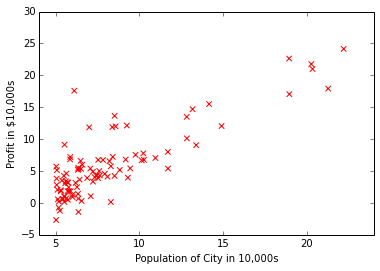

In [72]:
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

### Cost Function
<p>
<font size="3em">$h_θ(x) = θ^Tx$</font>
<p>
<font size="3em">$J = \frac{1}{2m}\sum_{i=1}^m{\left(h_θ(x^{(i)})-y^{(i)}\right)^2}$</font>

In [73]:
def cost(X, y, theta=[[0],[0]]):
    
    h = X.dot(theta)
    
    m = float(y.size) # number of samples
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return(J)

In [74]:
cost(X,y)

32.072733877455676

### Gradient Descent
<p>
<font size="3em">
$\frac{\partial}{\partial\theta_j} J(\theta) = \frac{1}{m}\sum_{i=1}^m \left[h_\theta(x^{(i)} - y^{(i)})x_j^{(i)}\right]$
</font>
<img src="images/gradient descent algorithm.png">

In [89]:
# step of gradient descent
def step(X, y, theta, alpha):
    m = float(y.size)
    h = X.dot(theta)
    theta = theta - alpha * (1/m) * X.T.dot(h-y)
    return(theta)

# gradient descent algorithm
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    J_history = np.zeros(num_iters)
    
    for i in np.arange(num_iters):
        theta = step(X, y, theta, alpha)
        J_history[i] = cost(X, y, theta)
        # we can break if the cost doesn't descrease
        
    return(theta, J_history)

### Plot the Cost vs. Number of iterations

('theta: ', array([-3.63029144,  1.16636235]))


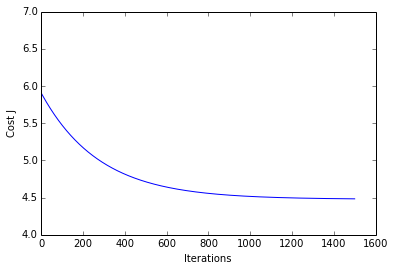

In [92]:
theta , Cost_J = gradientDescent(X, y)
print('theta: ',theta.ravel()) # theta for minimized cost J

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');